### This Jupyter Notebook aims at understanding the Lending Case Study as a part of EDA (Exploratory Data Analysis) and as graded course content. As a part of two team member team, we're attempting to apply the EDA concepts to the loan data set to understand patterns related to consumer and loan attributes, which will help the loan/business team to take necessary actions. 

### Import necessary python-libraries required for EDA

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

### Import/Read the Loan Data Set into Pandas DataFrame

In [5]:
loan_df = pd.read_csv("./loan.csv",low_memory=True)
#pd.set_option('display.max_columns', None)

### DataFrame Head()

In [6]:
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Data Frame Tail()

In [7]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN

### DataFrame Description

In [8]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

### Data Set Columns
#### Current Data Set has 111 Columns

In [9]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Customer Demographic Column Information

__*emp_title*__, __*emp_length*__, __*home_ownership*__, __*annual_inc*__, __*verification_status*__,

__*addr_state*__, __*zip_code*__, __*title*__, __*purpose*__, __*desc*__, __*url*__

### Credit Information : Borrower/Customer Behavior Column Information
__*delinq_2yrs*__, __*earlist_cr_line*__, __*inq_last_6mths*__, __*open_acc*__, __*pub_rec*__, __*revol_bal*__, __*revol_util*__, __*total_acc*__,

__*out_prncp*__, __*out_prncp_inv*__, __*total_pymnt*__, __*total_pymnt_inv*__, __*total_rec_prncp*__, __*total_rec_int*__, __*total_rec_late_fee*__,

__*recoveries*__, __*collection_recovery_fee*__, __*last_pymnt_d*__, __*last_pymnt_amnt*__, __*next_pymnt_d*__, __*last_credit_pull_d*__,

__*application_type*__

### Loan Characteristics Column Information


__*loan_amnt*__, __*funder_amnt*__, __*funded_amnt_inv*__, __*int_rate*__, __*loan_status*__,
 __*grade*__, __*sub_grade*__, __*dti*__, __*loan_issue_d*__, __*term*__, __*installment*__


### DataFrame Information()

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Column DTypes

In [11]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Given Data Set Shape
#### Given Data consists of 39717 rows and 111 columns

In [12]:
loan_df.shape

(39717, 111)

### Check the count of NAN/Null Values in the Data Set

In [13]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Convert the count of NAN/Null values in the data set into %Percentage

In [14]:
null_nan_per = round(((loan_df.isnull().sum()*100)/len(loan_df)),2)
print(null_nan_per)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64


### Total % of Nan/Null values in the DataSet

__*~Nearly 51.34% values are null in the given dataset*__

In [15]:
((loan_df.isnull().sum().sum()*100)/(loan_df.shape[0]*loan_df.shape[1]))

51.33989643393677

### Plot Histogram of NAN/Null values so far found in the data set


<AxesSubplot:ylabel='Frequency'>

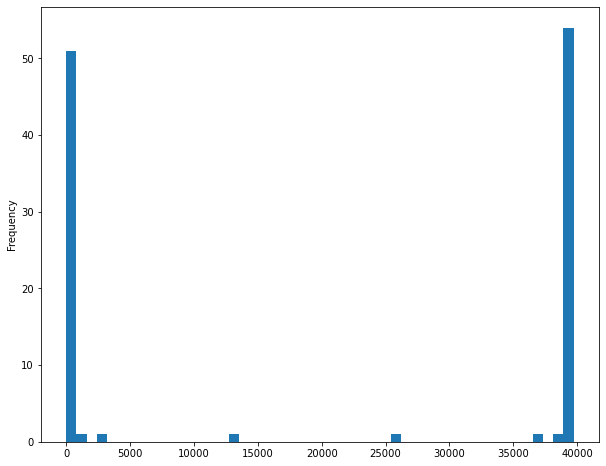

In [16]:
nan_null_val = loan_df.isnull().sum()
nan_null_val.plot(kind='hist',bins=50,figsize=(10,8))

### Plot HeatMap of Nan/Null Values

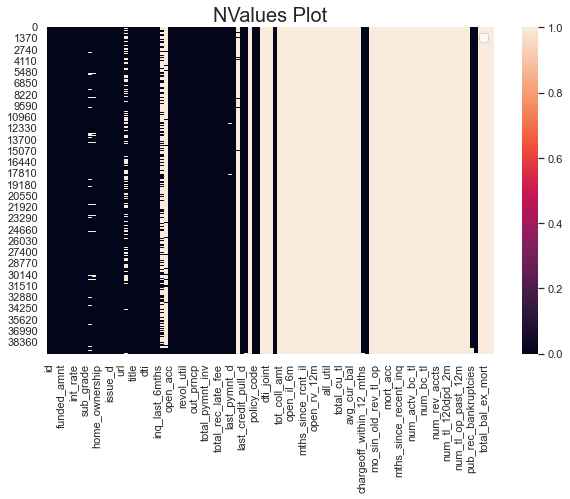

In [17]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.heatmap(loan_df.isnull())
plt.title('NValues Plot',fontdict={'fontsize': 20})
plt.legend(loan_df.isnull())
plt.show()

### Check if there are any Duplicates
#### Observation : No Duplicates Found

In [18]:
print(loan_df.duplicated(subset=None, keep='first').count())
print(loan_df[loan_df.duplicated(['id'])])


39717
Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_uti

### Check Empty Rows/Columns
__* *Empty Rows Count : 0* *__

__* *Empty Columns Count : 54* *__

In [19]:
print('Number of empty Rows:', loan_df.isnull().all(axis=1).sum())
print('Number of empty Columns:', loan_df.isnull().all(axis=0).sum())


Number of empty Rows: 0
Number of empty Columns: 54


### Get the glimpse of columns which have gt 0% missing values

In [20]:
print(null_nan_per[null_nan_per > 0])

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


### Data Cleaning

__*Step-01 -> Removing the 58 columns having nan-null values gt 30%*__

In [21]:
print(sorted(nan_null_val[null_nan_per > 30].to_dict().keys()))
print("Removing the above columns count " + str(len(nan_null_val[null_nan_per > 30].to_dict().keys())))
loan_df.drop(nan_null_val[null_nan_per > 30].index, axis=1, inplace=True)

['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'desc', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_

__*Step-02 -> Finding unique columns values equal to 1 after removing nan-null values gt 30%*__

These columns at the first glance are not required for our EDA and forms the further step in Datacleaning

In [22]:
uni_df = loan_df.nunique().sort_values().head(20)
print(uni_df[uni_df == 1])


tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
dtype: int64


__*Step-03 -> Dropping the above columns from the given data set as they don't add value to our EDA*__

In [23]:
second_step_cols_to_be_dropd = ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',
                               'application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan']
print("Dropping the following " + str(len(second_step_cols_to_be_dropd)) + " columns")
print(second_step_cols_to_be_dropd)
loan_df.drop(second_step_cols_to_be_dropd,axis=1,inplace=True)

Dropping the following 9 columns
['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']


__*Step-04 -> Further dropping the 15 columns*__

__*'url', 'member_id', *__ [Keeping id as primaryKey instead of member_id and url columns as the latter group has same unique values as id]

__* 'emp_title', 'title', *__ [Dropping as they've more unique string values probably not useful for EDA]

__* 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', *__ 

__* 'collection_recovery_fee, 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv' *__ [Dropping the above columns are they're related to borrower]

In [24]:
thirdStep_cols_toBe_dropd = ['url','member_id','emp_title', 'earliest_cr_line', 'title', 'sub_grade', 'total_rec_int', \
                           'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', \
                            'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', \
                            'out_prncp', 'out_prncp_inv', 'recoveries',]
loan_df.drop(thirdStep_cols_toBe_dropd,axis=1,inplace=True)

In [25]:
print(sorted(loan_df.columns))
print(loan_df.shape[1])
print(loan_df.zip_code.describe())
print('-' * 50)
print(loan_df.zip_code.info())

['addr_state', 'annual_inc', 'delinq_2yrs', 'dti', 'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_pymnt_amnt', 'loan_amnt', 'loan_status', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'term', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'verification_status', 'zip_code']
29
count     39717
unique      823
top       100xx
freq        597
Name: zip_code, dtype: object
--------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: zip_code
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB
None




__*Step-04 -> Replacing Months in 'Term column' to just month number and by removing extra space*__

__*Print and Verify the value counts of 'term' column*__

In [26]:
loan_df['term'] = loan_df['term'].apply(lambda x : x.replace("months",""))
print(loan_df.term)
print(loan_df.term.value_counts())

0         36 
1         60 
2         36 
3         36 
4         60 
         ... 
39712     36 
39713     36 
39714     36 
39715     36 
39716     36 
Name: term, Length: 39717, dtype: object
 36     29096
 60     10621
Name: term, dtype: int64


__*Step-05 -> Removing '%' percentage from 'int_rate' column*__

__*Print & Verify the value counts of the 'int_rate' column*__

__*Convert the column type to float*__

In [27]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : x.replace('%',''))
print(loan_df['int_rate'])
print(loan_df.int_rate.value_counts())

loan_df['int_rate'] = loan_df['int_rate'].astype('float64')

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64


__*Step-06 -> Replace ('< 1' , 0.5), ([year, years, '+'], with ('')) and Modify 'emp_length' column to float-type*__


__*Observations:->*__
   
   _There are 1075 NAN/Null records_
   
   _These will be filled with mode values_

In [28]:
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : str(x).replace("years",""))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : str(x).replace("year",""))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : str(x).replace("+",""))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : str(x).replace("< 1","0.5"))
loan_df['emp_length'] = loan_df['emp_length'].astype('float64')

# Filling NA values with column mode values
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0])

print(loan_df['emp_length'].value_counts())


10.00    9954
0.50     4583
2.00     4388
3.00     4095
4.00     3436
5.00     3282
1.00     3240
6.00     2229
7.00     1773
8.00     1479
9.00     1258
Name: emp_length, dtype: int64


__*Step-07 -> Modify 'issue_d' column and extract year/month new column*__

In [29]:
loan_df.issue_d.value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [30]:
print(loan_df.select_dtypes(include=['float']).columns)
print(loan_df.select_dtypes(include=['object']).columns)
print(loan_df.select_dtypes(include=['int']).columns)

print(loan_df.info())
print(loan_df.describe())

Index(['funded_amnt_inv', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')
Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'revol_util'],
      dtype='object')
Index(['id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   in

__*Step 08 -> Filling NA values with 0*__

In [31]:
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [32]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

__*Step 09-> Exclude all loan_status values matching 'Current'*__

In [33]:
loan_newdf = loan_df[~(loan_df['loan_status'] == 'Current')]

In [34]:
loan_newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   emp_length            38577 non-null  float64
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  zip_code           

In [35]:
loan_newdf.issue_d = pd.to_datetime(loan_newdf.issue_d, format='%b-%y')

loan_newdf['issued_year'] = loan_newdf.issue_d.dt.year
loan_newdf['issued_month'] = loan_newdf.issue_d.dt.strftime('%b')
loan_newdf['issued_weekday'] = loan_newdf.issue_d.dt.weekday

loan_newdf['issued_year'] = loan_newdf['issued_year'].astype(object)
loan_newdf['issued_weekday'] = loan_newdf['issued_weekday'].astype(object)

loan_newdf.columns


Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issued_year', 'issued_month', 'issued_weekday'],
      dtype='object')

### DATA ANALYSIS

In [36]:
loan_newdf.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,676378.71,11047.03,10784.06,10222.48,11.93,322.47,5.13,68777.97,13.27,0.15,0.87,9.28,0.06,13289.49,22.05,11866.97,11271.20,2746.24,0.04
std,209263.90,7348.44,7090.31,7022.72,3.69,208.64,3.52,64218.68,6.67,0.49,1.07,4.40,0.24,15866.49,11.43,8809.86,8700.85,4494.65,0.20
min,54734.00,500.00,500.00,0.00,5.42,15.69,0.50,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,512033.00,5300.00,5200.00,5000.00,8.94,165.74,2.00,40000.00,8.13,0.00,0.00,6.00,0.00,3650.00,13.00,5513.50,5019.59,217.42,0.00
50%,656423.00,9600.00,9550.00,8733.44,11.71,277.86,4.00,58868.00,13.37,0.00,1.00,9.00,0.00,8762.00,20.00,9674.05,9066.66,568.26,0.00
75%,829146.00,15000.00,15000.00,14000.00,14.38,425.55,9.00,82000.00,18.56,0.00,1.00,12.00,0.00,16912.00,29.00,16136.95,15329.78,3447.25,0.00
max,1077501.00,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,90.00,58563.68,58563.68,36115.20,2.00


### UNIVARIATE ANALYSIS

#### Univariate Analysis Function Generator

In [37]:
def lcs_univar_numeric_analysis_gen(columnName, dataFrame):

    sns.set(font_scale=2.1)
    fig , axes = plt.subplots(1, 2, figsize=(28,8), dpi = 50)

    sns.boxplot(ax=axes[0], x=dataFrame[columnName])
    axes[0].set_title(columnName+" Distribution")

    sns.histplot(ax=axes[1], x=dataFrame[columnName],kde=True)
    axes[1].set_title(columnName+" Distribution and Density")


    locs, labels = plt.xticks()
    plt.show()

def lcs_univar_category_analysis_gen(columnName, dataFrame):
    sns.set(font_scale=1)
    plt.figure(figsize=[9.5,4.5])
    ax=sns.countplot(x=dataFrame[columnName], data=dataFrame)
    plt.title(columnName+ ' distribution')
    plt.xticks(rotation=90)
    plt.show()

    

##### Univariate Numerical Analysis

#### Plotting Numerical Columns for Outlier Identification and Treatment of numerical columns

List of Numerical Columns = 
__*'funded_amnt_inv', 'int_rate', 'installment', 'emp_length',
'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv',
'last_pymnt_amnt', 'pub_rec_bankruptcies','id', 'loan_amnt',
'funded_amnt', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
'pub_rec', 'revol_bal', 'total_acc'*__

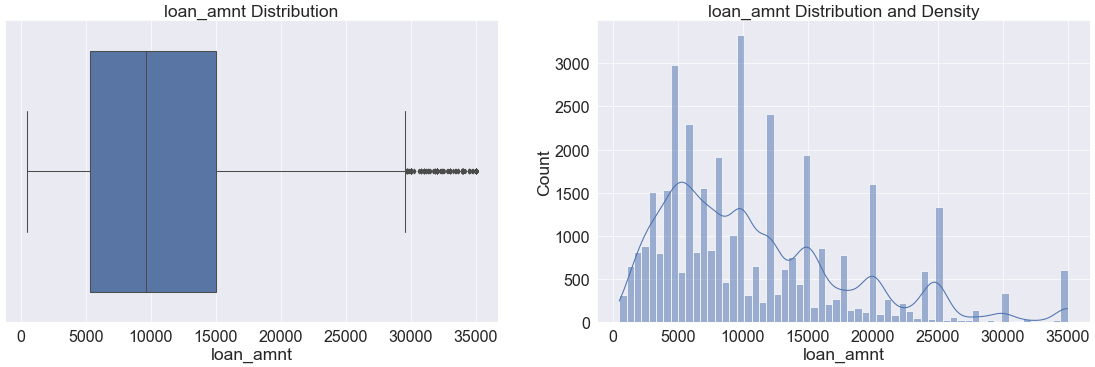

In [38]:
lcs_univar_numeric_analysis_gen('loan_amnt', loan_newdf)

Note & Observations : __*Loan_Amt_Distribution*__

Implying 75% of the distribution lies below 15k.

There are outliers observed beyond 30k.



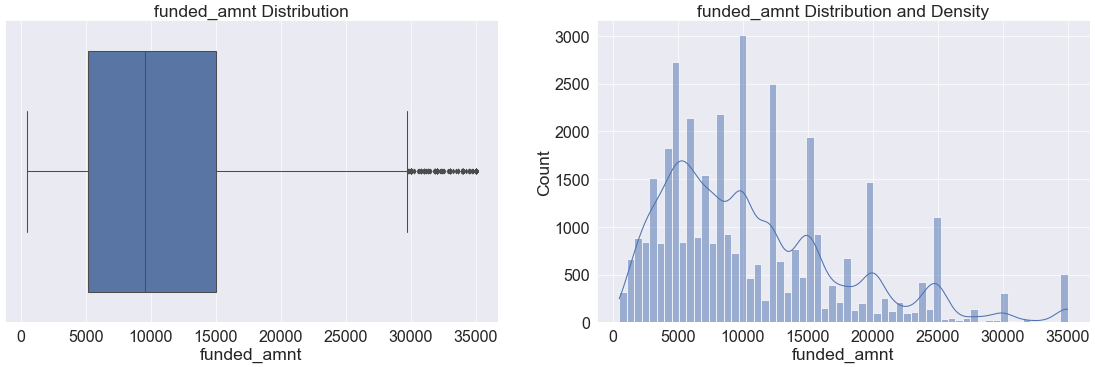

In [39]:
lcs_univar_numeric_analysis_gen('funded_amnt', loan_newdf)

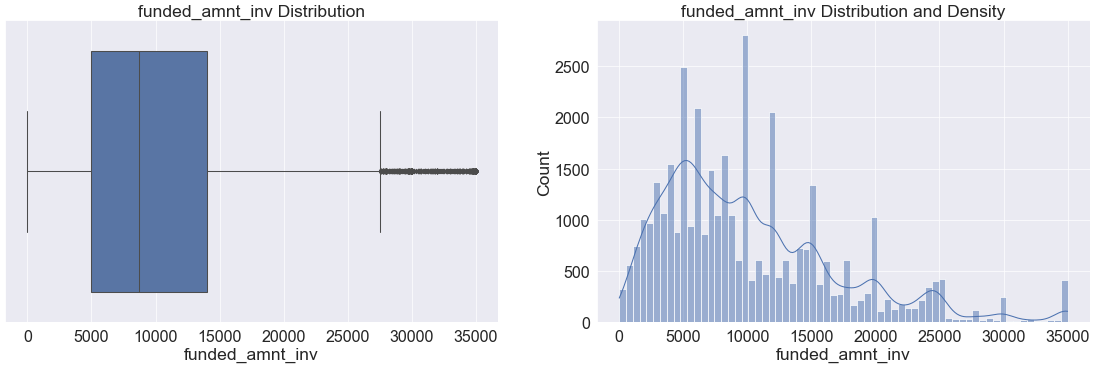

In [40]:
lcs_univar_numeric_analysis_gen('funded_amnt_inv',loan_newdf)

Notes & Observations : __*loan_amnt & funded_amnt & funded_amnt_inv*__

1. There are clearly outliers beyond 26k and the outlier distribution seems continuous.
2. Almost 50% of values lies between the range of (~5k,~14k) ie loan amount and funding amount, funding amount investors.
3. Funding amount inverstor is never high than the requested loan amount ie they have invested nearly similar requested loan amounts.
4. Few loan amounts are not funded by the funding amount investors.
5. Even though there seems relationship between these three data(s), further examining explains independent nature of loan_amnt compared to these two.

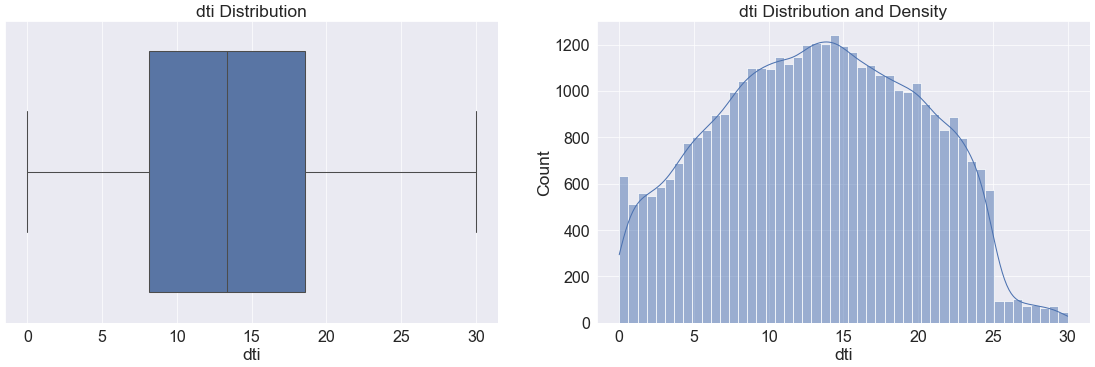

In [41]:
lcs_univar_numeric_analysis_gen('dti', loan_newdf)


Note and Observations : __*DTI Distribution*__

1. DTI distribution ratio appears closer to normal distribution with no outliers

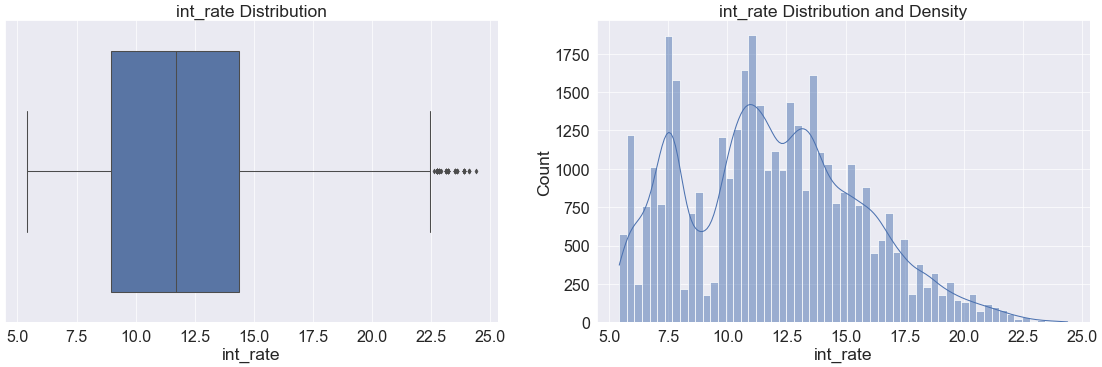

In [42]:
lcs_univar_numeric_analysis_gen('int_rate',loan_newdf)

In [43]:
print(loan_newdf.int_rate.describe())

print(loan_newdf.int_rate.quantile(np.arange(0.75,1,0.01)))

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64
0.75   14.38
0.76   14.59
0.77   14.72
0.78   14.84
0.79   14.96
0.80   15.21
0.81   15.27
0.82   15.37
0.83   15.62
0.84   15.70
0.85   15.96
0.86   16.02
0.87   16.32
0.88   16.45
0.89   16.69
0.90   16.82
0.91   17.14
0.92   17.39
0.93   17.58
0.94   17.99
0.95   18.31
0.96   18.67
0.97   19.29
0.98   19.91
0.99   20.99
Name: int_rate, dtype: float64


Notes & Observations : __*int_rate*__

1. 25th Quartile value is 8.94%
2. Median is 11.7%
3. 75% Quartile values is 14.38% implying majority of the interest rate(s) are below 14.38
4. Outliers observed in the range of ~(22,25)%
5. The variation in interest rate(s) can be attributed to the risks involved in loan procurement and loan term.
6. The mean of right skewed distribution is 11.9%

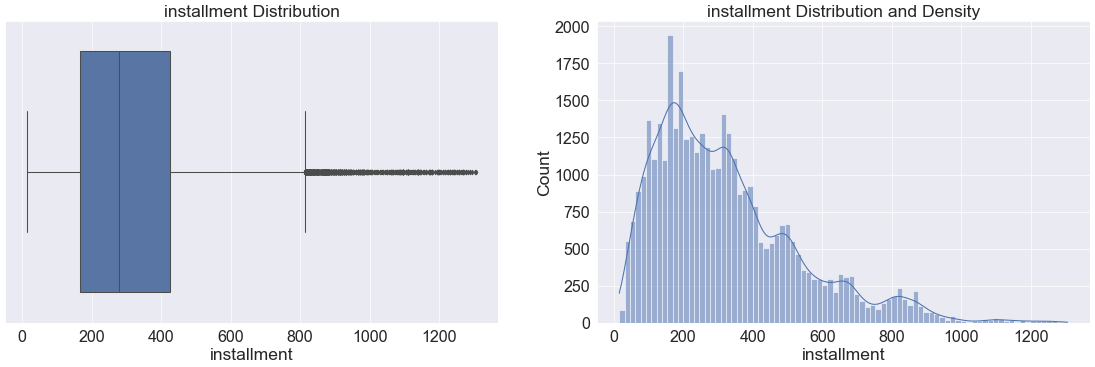

In [44]:
lcs_univar_numeric_analysis_gen('installment',loan_newdf)

In [45]:
print(loan_newdf.installment.describe())

print(loan_newdf.installment.quantile(np.arange(0.8,1,0.01)))

count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64
0.80   480.33
0.81   488.60
0.82   497.01
0.83   506.27
0.84   516.97
0.85   528.10
0.86   542.30
0.87   560.00
0.88   577.74
0.89   597.78
0.90   620.90
0.91   645.25
0.92   662.95
0.93   682.74
0.94   709.83
0.95   760.82
0.96   804.67
0.97   830.84
0.98   870.39
0.99   931.09
Name: installment, dtype: float64


Notes & Observations : __*installment*__

1. 25th Quartile value is ~165.74, whereas 75th Quartile value is ~425.5.
2. Median installment value for a loan application is ~277.
3. 75% of values lies below ~425.
4. Outlier presence is observed in the range (500,1300).
5. Mean of the distribution is ~322 

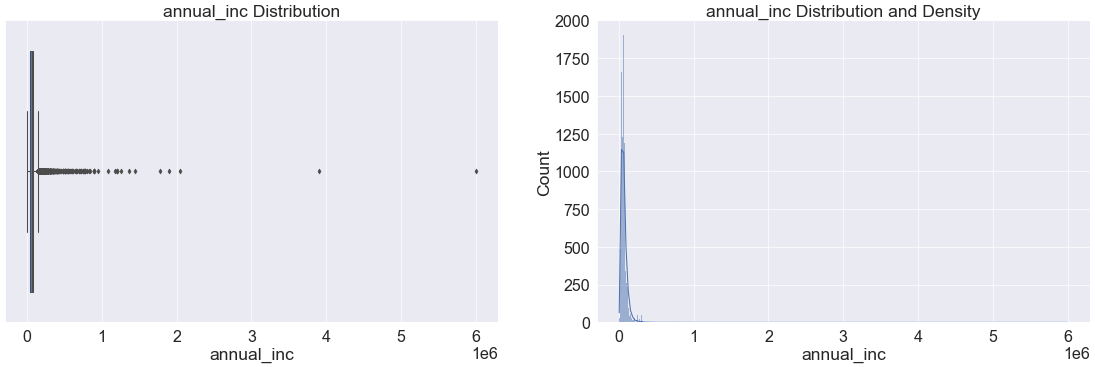

In [46]:
lcs_univar_numeric_analysis_gen('annual_inc',loan_newdf)

In [47]:
loan_newdf.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

Notes & Observations : __*annual_inc*__

1. Annual_Inc data has outliers. Propering binning has to be applied for further analysis.
2. On observation, we find the outliers lower limit is 30 lakhs. So removing such outliers form our next step.
3. On another note, this would probably minimise or compromise our genuine ableness to evaluate loan for high income customers.

In [48]:
loan_newdf = loan_newdf[loan_newdf.annual_inc <= 3000000]   

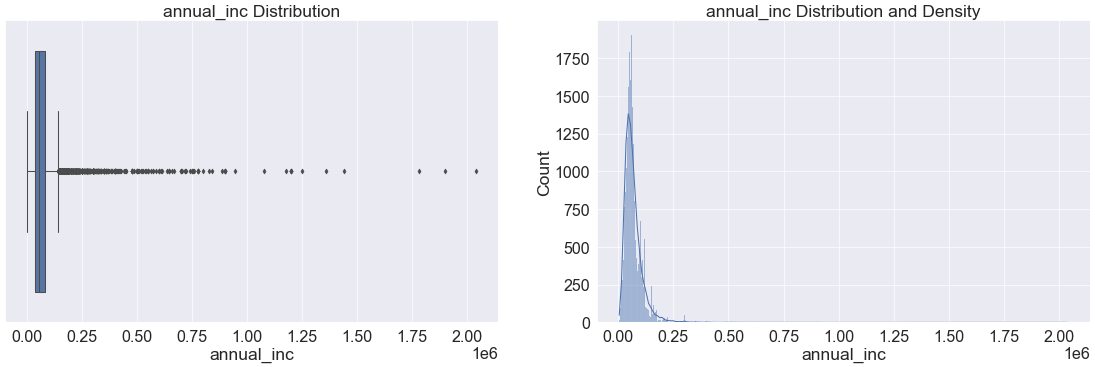

In [49]:
lcs_univar_numeric_analysis_gen('annual_inc',loan_newdf)

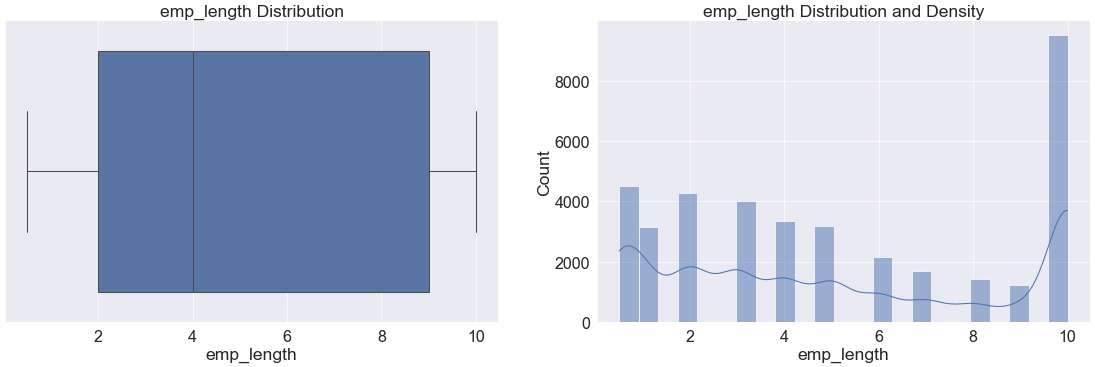

In [50]:
lcs_univar_numeric_analysis_gen('emp_length',loan_newdf)

Notes & Observations : __*emp_length*__


1. The Aggregated count for Category 10 (Years_Of_Experience >= 10) is highest followed by '< 1 year represented by 0.5'> followed by 2 years etc.
2. It probably seems that the lending club is skewed towards younger employees or old employees.

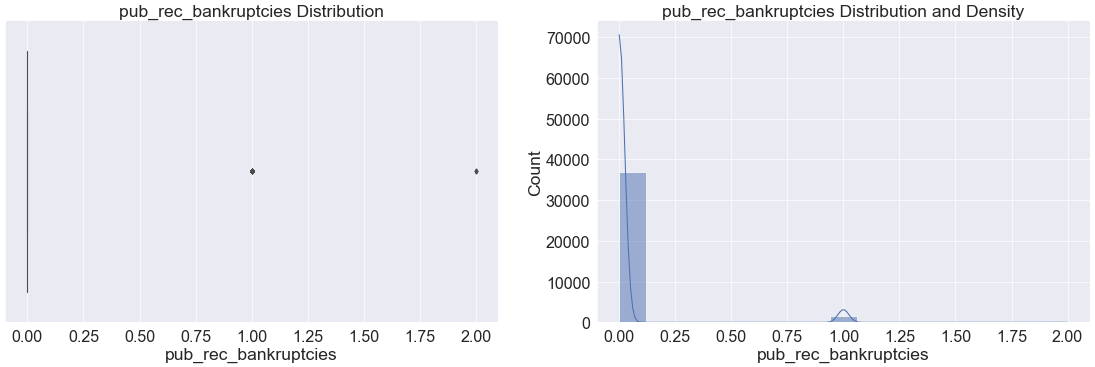

In [51]:
lcs_univar_numeric_analysis_gen('pub_rec_bankruptcies',loan_newdf)

Notes & Observation : __*pub_rec_bankruptcies*__

1. This clearly shows most of the customers/members, do not have any history of bankruptcy.

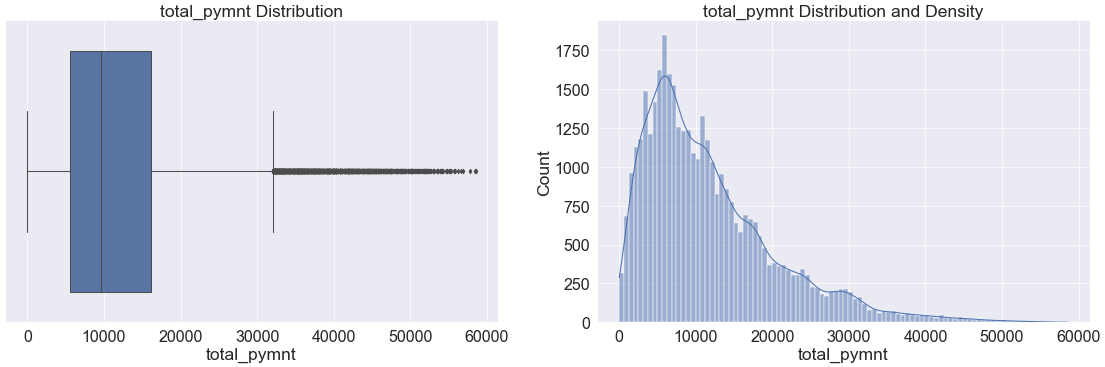

In [52]:
lcs_univar_numeric_analysis_gen('total_pymnt',loan_newdf)

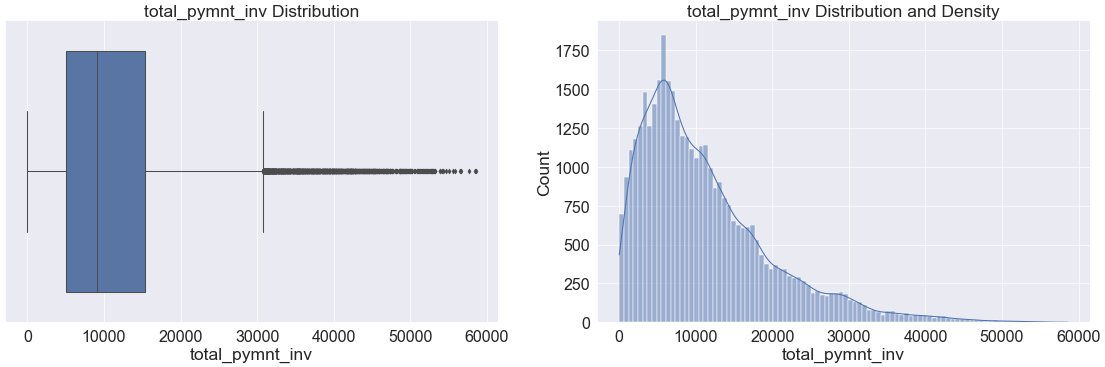

In [53]:
lcs_univar_numeric_analysis_gen('total_pymnt_inv',loan_newdf)

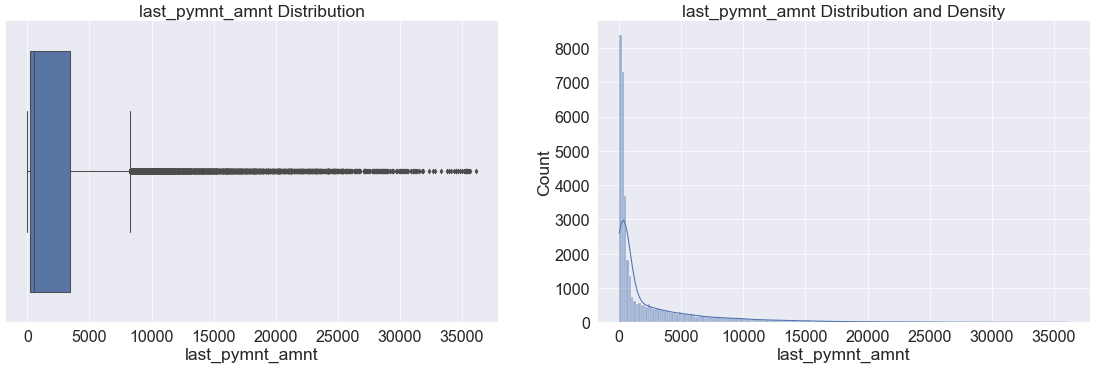

In [54]:
lcs_univar_numeric_analysis_gen('last_pymnt_amnt',loan_newdf)

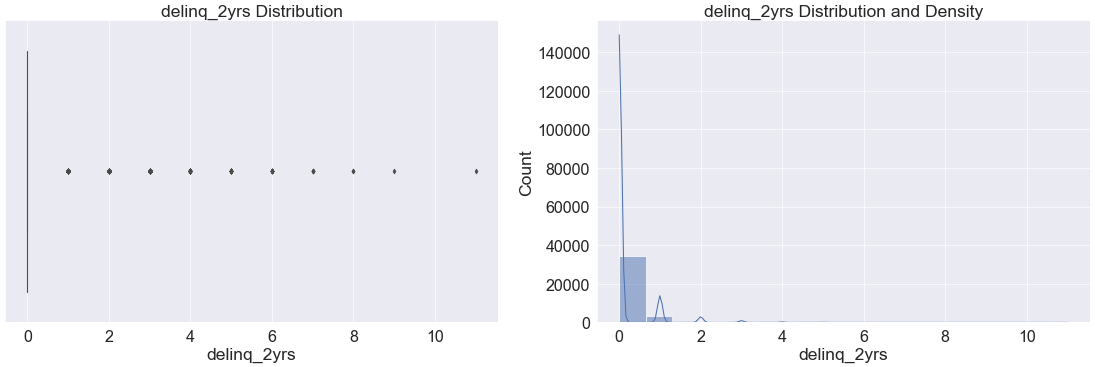

In [55]:
lcs_univar_numeric_analysis_gen('delinq_2yrs',loan_newdf)

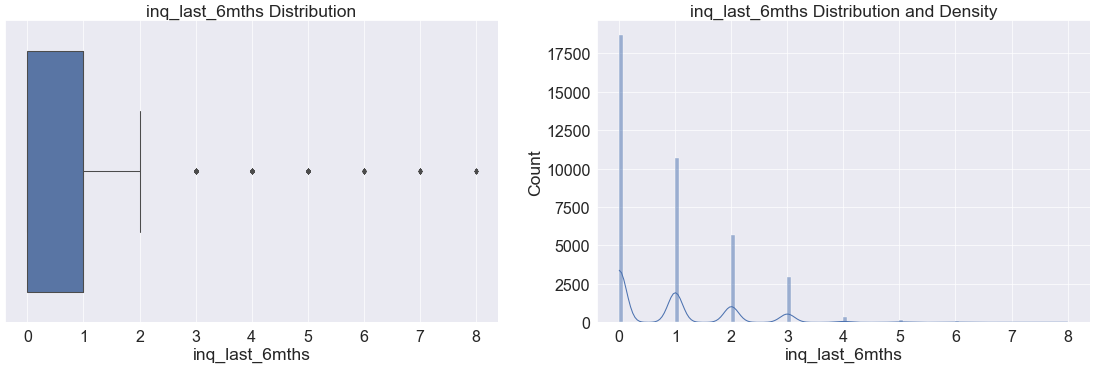

In [56]:
lcs_univar_numeric_analysis_gen('inq_last_6mths',loan_newdf)

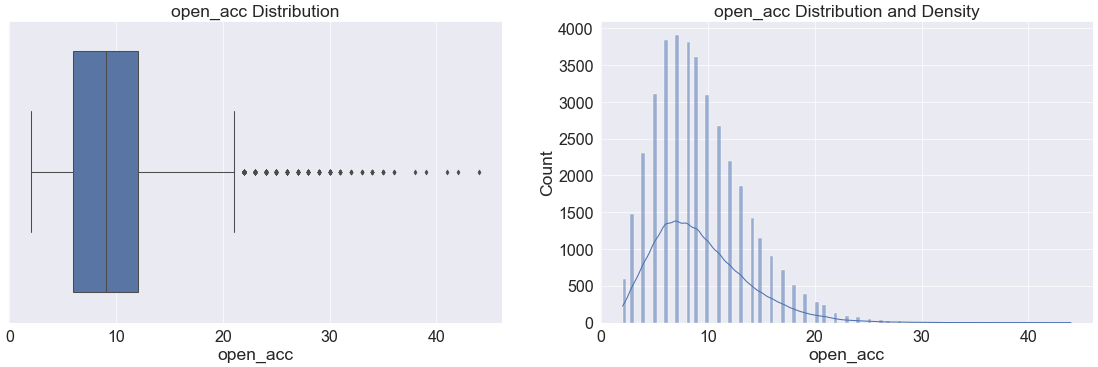

In [57]:
lcs_univar_numeric_analysis_gen('open_acc',loan_newdf)

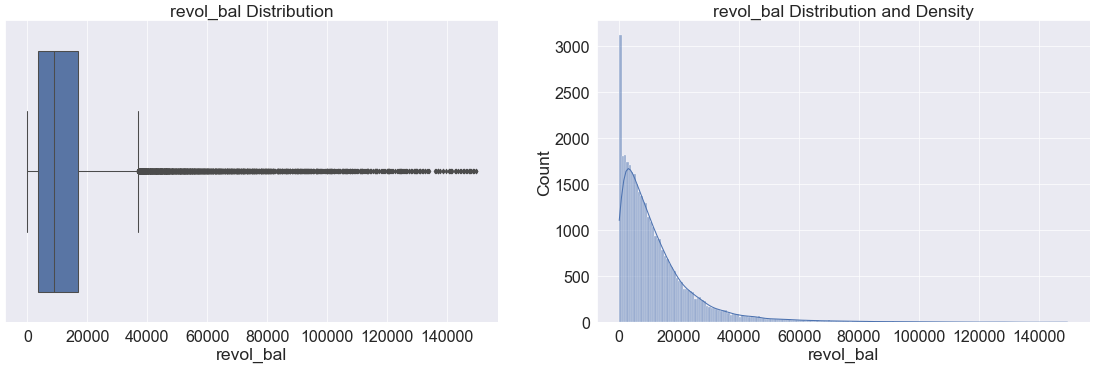

In [58]:
lcs_univar_numeric_analysis_gen('revol_bal',loan_newdf)

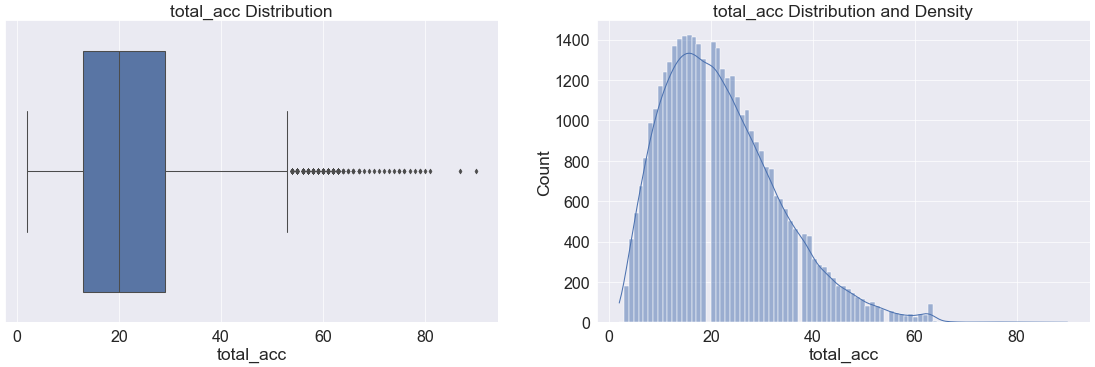

In [59]:
lcs_univar_numeric_analysis_gen('total_acc',loan_newdf)

#### Univariate Categorical Analysis

In [60]:
fullypaid_percent = loan_newdf.loan_status.value_counts()[0]*100/len(loan_newdf.loan_status)
charged_off_percent = loan_newdf.loan_status.value_counts()[1]*100/len(loan_newdf.loan_status)

print(loan_newdf.loan_status.value_counts())
print(fullypaid_percent,charged_off_percent)
print(loan_newdf.loan_status.value_counts()[1]*100/loan_newdf.loan_status.value_counts()[0])

Fully Paid     32948
Charged Off     5627
Name: loan_status, dtype: int64
85.41283214517175 14.587167854828257
17.078426611630448


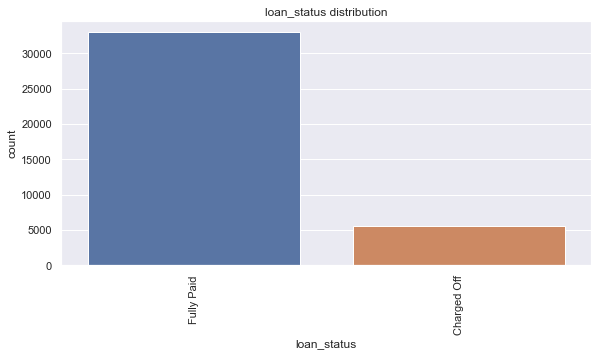

In [61]:
lcs_univar_category_analysis_gen('loan_status',loan_newdf)

Notes & Observation : __*loan_status*__

1. Fully_Paid -> __32948__, Charged_Off -> __5627__
2. Percent_Of_Charged_Off_Total = __14.59%__
3. Percent_Of_FullyPaid_Total = __85.41%__
4. Percent_Of_Charged_Off_vs_FullPaid = __17.08%__

In [62]:
print(loan_newdf.term.describe())
print(loan_newdf.term.value_counts())


count     38575
unique        2
top         36 
freq      29095
Name: term, dtype: object
 36     29095
 60      9480
Name: term, dtype: int64


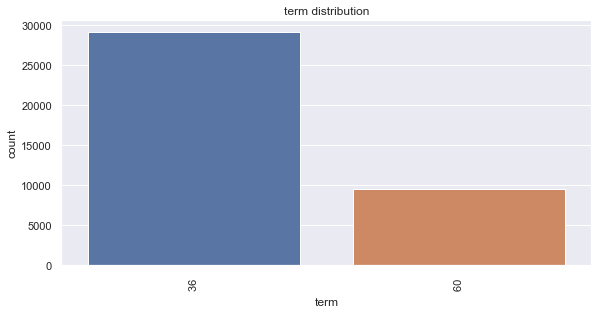

In [63]:
lcs_univar_category_analysis_gen('term',loan_newdf)

Notes & Observations : __*term*__

1. Loan term of 36 months is majority compared to 60 months loan term ie People are opting for minimum months loan term when they're applying for loan.
2. %tage calculations :

   2.1 %36_months_term_total = 75.42% i.e 3/4th majority
   
   2.2 %60_months_term_total = 24.58% i.e 1/4th minority

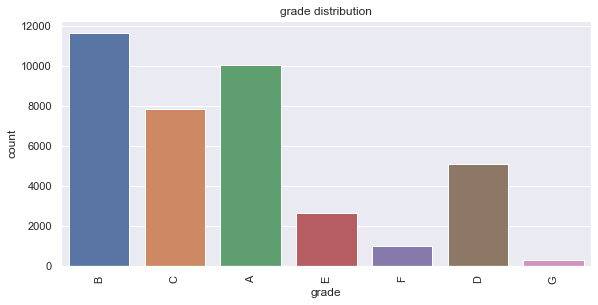

In [64]:
lcs_univar_category_analysis_gen('grade',loan_newdf)

Notes & Observations : __*Grade*__

1. The majority of people belong to (A,B,C) grades and nearly 75% of the grades fall in these categories.
2. Grade B > Grade A > Grade C. This implies Grade_B_Applicants > Grade_A_Applicants (Top Quality Loan Applicants)

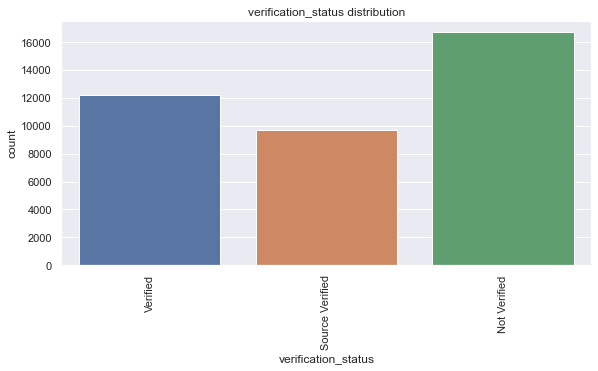

In [65]:
lcs_univar_category_analysis_gen('verification_status',loan_newdf)

Notes & Observation : __*Verification_Status*__

1. Not-Verified-Application-Status appears to be large for customers and poses quite a risk on data quality and loan data in evaluating customers ableness to pay the loan.

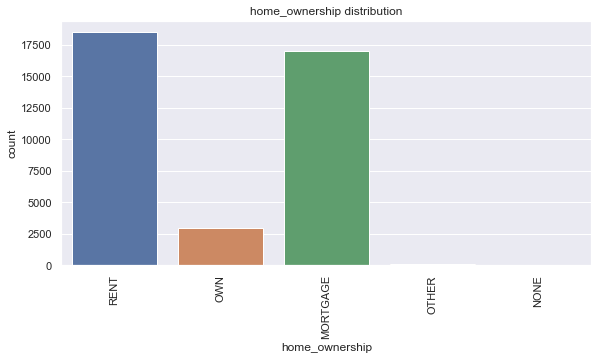

In [66]:
lcs_univar_category_analysis_gen('home_ownership',loan_newdf)

Notes & Observation : __*Home_Ownership*__

1. The first observation is that the majority of loan applicants are rented people or have mortgaged their other possessions or already mortgaged
2. Very less percentage of people ie ~6% have their own house.

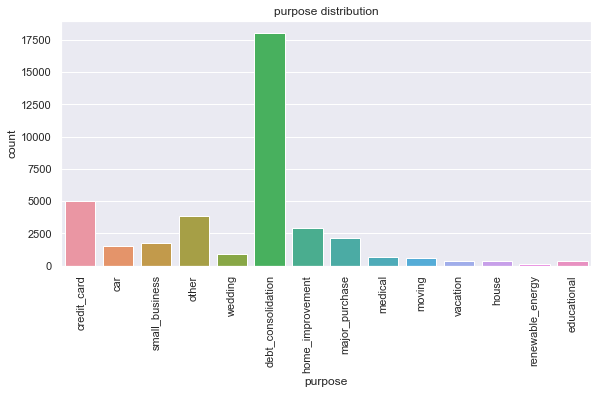

In [67]:
lcs_univar_category_analysis_gen('purpose',loan_newdf)

In [68]:
print(loan_newdf.purpose.value_counts())
print(loan_newdf.purpose.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2873
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64
debt_consolidation     46.8%
credit_card           13.03%
other                 10.02%
home_improvement       7.45%
major_purchase         5.57%
small_business         4.55%
car                    3.89%
wedding                 2.4%
medical                1.77%
moving                 1.49%
vacation               0.97%
house                  0.95%
educational            0.84%
renewable_energy       0.26%
Name: purpose, dtype: object


Notes & Observation : __*Purpose*__

1. Nearly 18055 records aggregated to ~47% ie 'debt_consolation' forms the major purpose for those applying loans.

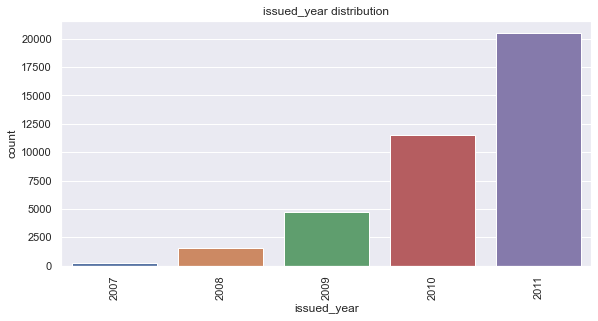

In [69]:
lcs_univar_category_analysis_gen('issued_year',loan_newdf)

Notes & Observations : __*issued_year*__

1. We observe a steep increasing trend in the number of loan applicants from 2007 - 2011.

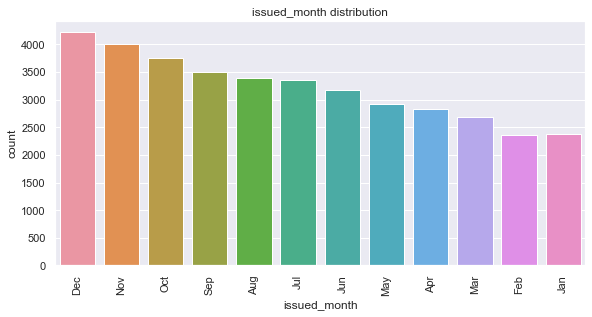

In [70]:
lcs_univar_category_analysis_gen('issued_month',loan_newdf)

Notes & Observations : __*issued_month*__

1. We observe loans were more in Oct,Nov,Dec months and highest in December month.
2. Extracted info : Oct/Nov/Dec - Holiday Months.

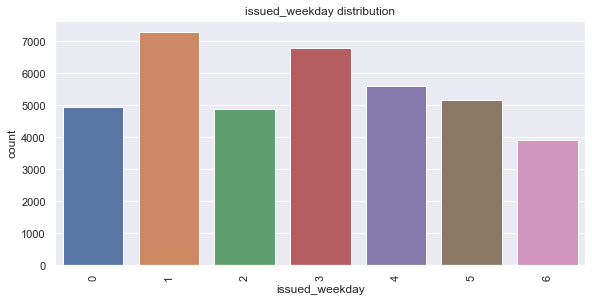

In [71]:
lcs_univar_category_analysis_gen('issued_weekday',loan_newdf)

Notes & Observations : __*issued_weekday*__

1. We clearly observe that loan applications were more on Tuesdays and Thursdays compared to other week days

<AxesSubplot:>

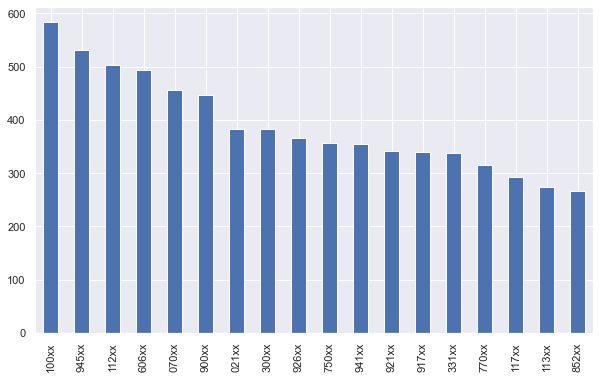

In [72]:
loan_newdf.zip_code.value_counts().nlargest(18).plot.bar()


Notes & Observation : 

1. For some specific zipcodes, there could be direct or inverse correlation on the necessity of loan or using loan amount for other spendings.


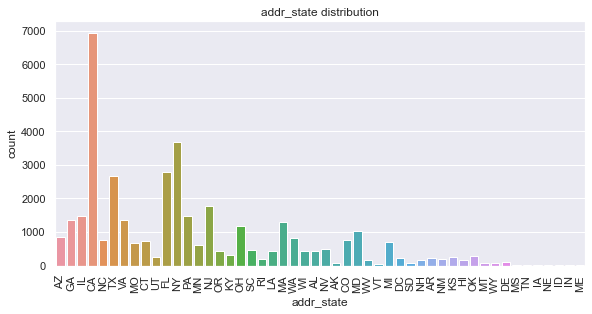

In [73]:
lcs_univar_category_analysis_gen('addr_state',loan_newdf)

Notes & Observations : __addr_state__

1. States like CA, NY, TX, FL create top loan accounts with greater urbanization, tax rates and higher income compared to the averages.

### Bivariate Analysis

#### Bivariate Plot Generator

In [91]:
def lcs_bivariate_plot_genrator(feature,label_rotation=False,horizontal_layout=True):
    sns.set(font_scale=1)
    temp = loan_newdf[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of Applications': temp.values})

    # Calculate the percentage of loan_status_new =1 per category value
    cat_perc = loan_newdf[[feature, 'numeric_loan_status']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='numeric_loan_status', ascending=False, inplace=True)
    sns.set_style("whitegrid")

    
    if(horizontal_layout):
        sns.set(font_scale=1.5)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))        
    else:
        sns.set(font_scale=1.5)
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,10))
    
    sns.set_color_codes("pastel")
    sns.set_style("whitegrid")

    s = sns.barplot(ax=ax1, x = feature, y="Number of Applications",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    #s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    s = sns.barplot(ax=ax2, x = feature, y='numeric_loan_status', data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of charged Off [%]')
    
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show();

In [92]:
loan_newdf['numeric_loan_status']= loan_newdf['loan_status'].map({'Charged Off':1,'Fully Paid':0})

In [93]:
loan_newdf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issued_year,issued_month,issued_weekday,numeric_loan_status
0,1077501,5000,5000,4975.00,36,10.65,162.87,B,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1,3,0,13648,83.70%,9,5863.16,5833.84,171.62,0.00,2011,Dec,3,0
1,1077430,2500,2500,2500.00,60,15.27,59.83,C,0.50,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,5,3,0,1687,9.40%,4,1008.71,1008.71,119.66,0.00,2011,Dec,3,1
2,1077175,2400,2400,2400.00,36,15.96,84.33,C,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2,2,0,2956,98.50%,10,3005.67,3005.67,649.91,0.00,2011,Dec,3,0
3,1076863,10000,10000,10000.00,36,13.49,339.31,C,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1,10,0,5598,21%,37,12231.89,12231.89,357.48,0.00,2011,Dec,3,0
5,1075269,5000,5000,5000.00,36,7.90,156.46,A,3.00,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,3,9,0,7963,28.30%,12,5632.21,5632.21,161.03,0.00,2011,Dec,3,0


['numeric_loan_status'] ['funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


ValueError: num must be 1 <= num <= 9, not 10

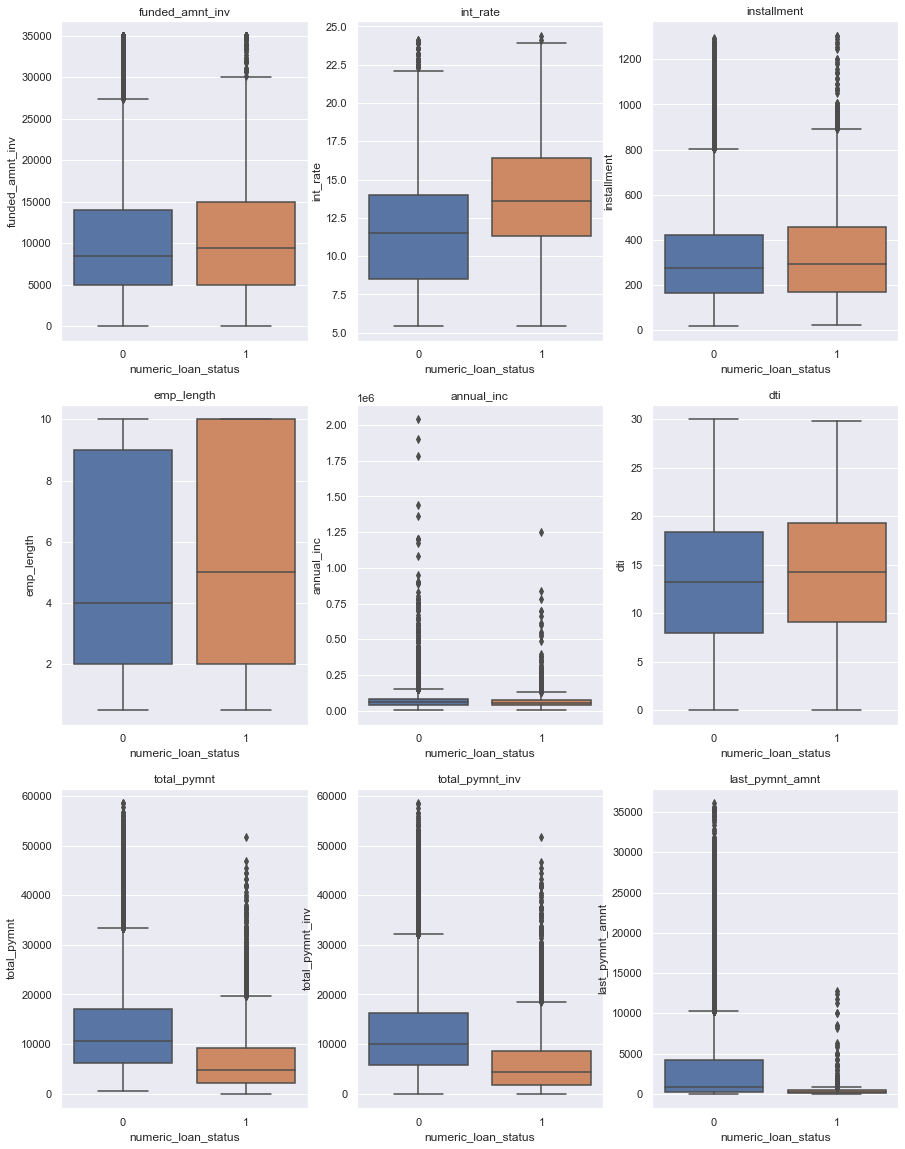

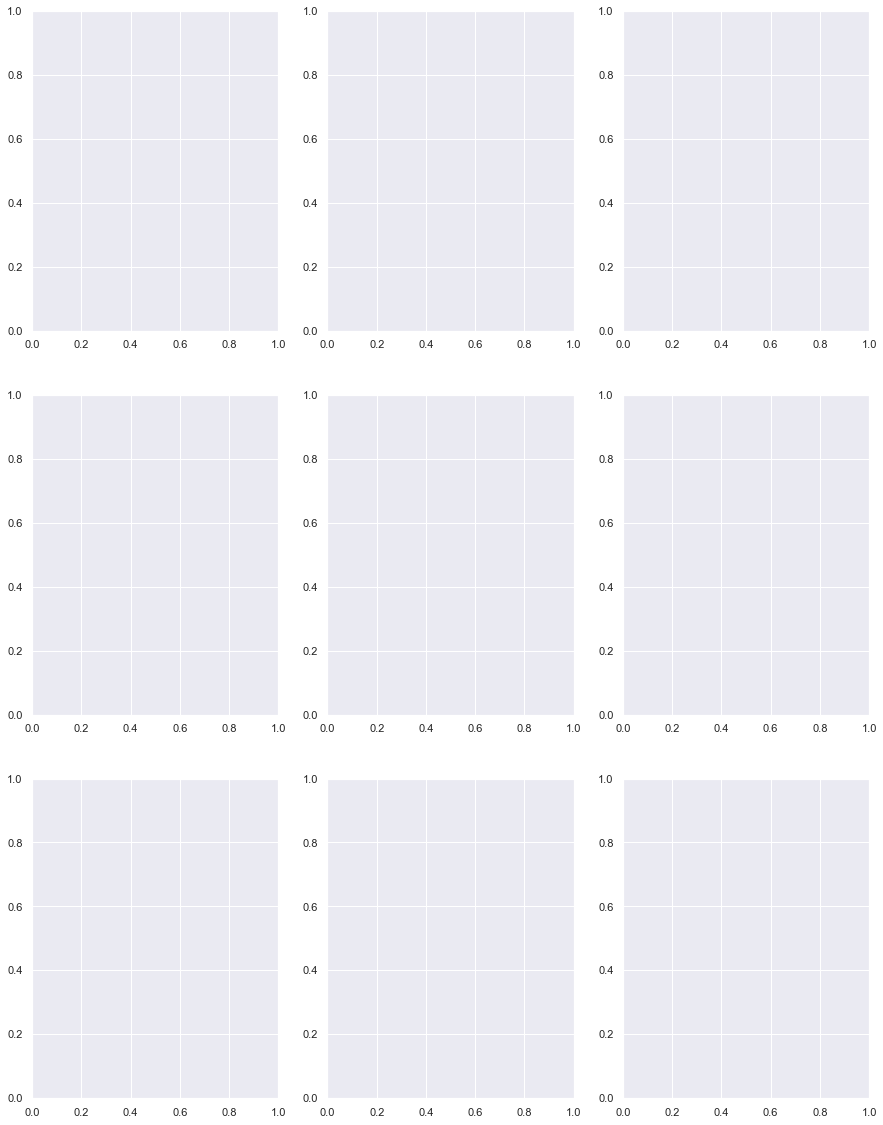

In [94]:
columns_set_1 = ['numeric_loan_status']
columns_set_2 = loan_newdf.select_dtypes(include=['float']).columns.to_list()
print(columns_set_1, columns_set_2)

def lcs_outlier_iden_barplotter(columnName1, columnName2, figSizeX, figSizeY, subPlotX, subPlotY, subPlotIndex=1):
    f, axs = plt.subplots(subPlotX,subPlotY,figsize=(figSizeX,figSizeY))
    for columnsb in columnName2:
        plt.subplot(subPlotX, subPlotY, subPlotIndex)
        sns.boxplot(x=columnName1[0],y=columnsb,data=loan_newdf)
        plt.title(columnsb)
        subPlotIndex+=1

        if subPlotIndex > 9: # Resetting subPlotIndex Value
            remSubPlotIndex = subPlotIndex+1
            lcs_outlier_iden_barplotter(columnName1, columnName2[remSubPlotIndex:], figSizeX, figSizeY, subPlotX, subPlotY)
            subPlotIndex = 1

        
            
    

lcs_outlier_iden_barplotter(columns_set_1, columns_set_2, 15, 20, 3, 3)